In [179]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import re

In [180]:
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [181]:
training_data = 'input/adult-training.csv'
test_data = 'input/adult-test.csv'
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']

In [182]:
train = pd.read_csv(training_data, names=columns)
test = pd.read_csv(test_data, names=columns)

In [183]:
# define function for estimating missing values in each columns
def missing_value(df):
    miss = []
    col_list = df.columns
    for column in col_list:
        missing = df[column].isnull().sum()
        miss.append(missing)
        list_of_missing = pd.DataFrame(list(zip(col_list, miss)))
    return list_of_missing

In [184]:
missing_value(train)# no missing value in every column

,0,1
0,Age,0
1,Workclass,0
2,fnlgwt,0
3,Education,0
4,Education Num,0
5,Marital Status,0
6,Occupation,0
7,Relationship,0
8,Race,0
9,Sex,0


In [185]:
missing_value(test)# have 1 missing value in each column except for 'age'

,0,1
0,Age,0
1,Workclass,1
2,fnlgwt,1
3,Education,1
4,Education Num,1
5,Marital Status,1
6,Occupation,1
7,Relationship,1
8,Race,1
9,Sex,1


In [186]:
train.Relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [187]:
test.Occupation.value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: Occupation, dtype: int64

In [188]:
# data cleasing

In [189]:
print(test.shape)

(16282, 15)


In [190]:
print(train.shape)

(32561, 15)


In [191]:
train.drop(train.index[0]).head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [192]:
test.drop(test.index[0]).head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [193]:
all_data = [train, test]
str_list = []
num_list = []
for data in all_data:
    for colname, colvalue in data.iteritems():
        if type(colvalue[1]) == str:
            str_list.append(colname)
        else:
            num_list.append(colname)

In [194]:
print(str_list)

['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Above/Below 50K', 'Age', 'Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Above/Below 50K']


In [195]:
len(str_list)

19

In [196]:
print(num_list)

['Age', 'fnlgwt', 'Education Num', 'Capital Gain', 'Capital Loss', 'Hours/Week', 'fnlgwt', 'Education Num', 'Capital Gain', 'Capital Loss', 'Hours/Week']


In [197]:
len(num_list)

11

In [198]:
for data in all_data:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True)
    data.dropna(inplace=True)

In [199]:
test.isnull().sum()

Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50K    0
dtype: int64

In [200]:
test.Relationship.value_counts()

 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: Relationship, dtype: int64

In [201]:
len(test)

15060

In [202]:
# creating the target variable

In [203]:
for data in all_data:
    data['target']=data['Above/Below 50K'].apply(lambda x: x.replace('.', ''))
    data['target']=data['target'].apply(lambda x: x.strip())
    data['target']=data['target'].apply(lambda x: 1 if x=='>50K' else 0)
    data.drop(['Above/Below 50K'], axis=1, inplace=True)

In [204]:
train.target

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
28       0
29       0
30       0
31       0
        ..
32526    0
32527    0
32528    0
32529    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32540    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: target, Length: 30162, dtype: int64

In [205]:
train.target.sum()/len(train)

0.24892248524633645

In [206]:
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(train[var], bin_value, labels=group)

In [207]:
bin_var(train, 'Education Num', [0,6,11,16], ['Low', 'Medium', 'High'])
bin_var(test, 'Education Num', [0,6,11,16], ['Low', 'Medium', 'High'])

In [208]:
train.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,target,Education NumCat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,High
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,High
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Medium
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Medium
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,High


In [209]:
pd.crosstab(train['Education NumCat'], train['target'])

target,0,1
Education NumCat,,
Low,2179,137
Medium,15865,3385
High,4610,3986


In [210]:
bin_var(train, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
bin_var(test, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

In [211]:
pd.crosstab(train['Hours/WeekCat'], train['target'], margins=True)

target,0,1,All
Hours/WeekCat,,,
Low,5369,505,5874
Medium,11829,3262,15091
High,4796,3349,8145
VeryHigh,660,392,1052
All,22654,7508,30162


In [212]:
occu = pd.crosstab(train['Occupation'], train['target'], margins=True).reset_index()

In [213]:
print(occu)

target          Occupation      0     1    All
0             Adm-clerical   3223   498   3721
1             Armed-Forces      8     1      9
2             Craft-repair   3122   908   4030
3          Exec-managerial   2055  1937   3992
4          Farming-fishing    874   115    989
5        Handlers-cleaners   1267    83   1350
6        Machine-op-inspct   1721   245   1966
7            Other-service   3080   132   3212
8          Priv-house-serv    142     1    143
9           Prof-specialty   2227  1811   4038
10         Protective-serv    434   210    644
11                   Sales   2614   970   3584
12            Tech-support    634   278    912
13        Transport-moving   1253   319   1572
14                     All  22654  7508  30162


In [214]:
def occup(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty', x):
        return 'Highskill'
    else:
        return 'Lowskill'

In [215]:
train['Occupa_cat']=train.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))
test['Occupa_cat']=test.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))

In [216]:
train.Occupa_cat.value_counts()

Lowskill     22132
Highskill     8030
Name: Occupa_cat, dtype: int64

In [217]:
bin_var(test, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])
bin_var(train, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

In [218]:
train['Marital Status_cat']=train['Marital Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')
test['Marital Status_cat']=test['Marital Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')

In [219]:
pd.crosstab(train['Race'], train['target'], margins=True)

target,0,1,All
Race,,,
Amer-Indian-Eskimo,252,34,286
Asian-Pac-Islander,647,248,895
Black,2451,366,2817
Other,210,21,231
White,19094,6839,25933
All,22654,7508,30162


In [220]:
train['Race_cat']=train['Race'].apply(lambda x: x.strip()).apply(lambda x: 'White' if x=='White' else 'Other')
test['Race_cat']=test['Race'].apply(lambda x: x.strip()).apply(lambda x: 'White' if x=='White' else 'Other')

In [221]:
train.Workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

In [222]:
def workclass(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'

In [223]:
train['WorfClass_cat']=train.Workclass.apply(lambda x: x.strip()).apply(lambda x: workclass(x))
test['WorfClass_cat']=test.Workclass.apply(lambda x: x.strip()).apply(lambda x: workclass(x))

In [167]:
# assign the target to Y variable

In [224]:
Y_tr = train['target']
Y_te = test['target']

In [225]:
train.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,...,Hours/Week,Country,target,Education NumCat,Hours/WeekCat,Occupa_cat,AgeCat,Marital Status_cat,Race_cat,WorfClass_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,0,High,Medium,Lowskill,Middle_aged,Single,White,gov
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,0,High,Low,Highskill,Middle_aged,married,White,selfempl
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,0,Medium,Medium,Lowskill,Middle_aged,Single,White,Private
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,0,Medium,Medium,Lowskill,Middle_aged,married,Other,Private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,0,High,Medium,Highskill,Young,married,Other,Private


In [226]:
pd.crosstab(train.Sex, train.target)

target,0,1
Sex,,
Female,8670,1112
Male,13984,6396


In [227]:
train.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Country', 'target',
       'Education NumCat', 'Hours/WeekCat', 'Occupa_cat', 'AgeCat',
       'Marital Status_cat', 'Race_cat', 'WorfClass_cat'],
      dtype='object')

In [228]:
train.drop(['Education','Occupation','Race','Education Num','Age', 'Hours/Week', 'Marital Status','target','fnlgwt','Workclass', 'Capital Gain','Capital Loss', 'Country'], axis=1, inplace=True)
test.drop(['Education','Occupation','Race','Education Num','Age', 'Hours/Week', 'Marital Status','Workclass','target','fnlgwt', 'Capital Gain','Capital Loss', 'Country'], axis=1, inplace=True)

In [230]:
train.columns

Index(['Relationship', 'Sex', 'Education NumCat', 'Hours/WeekCat',
       'Occupa_cat', 'AgeCat', 'Marital Status_cat', 'Race_cat',
       'WorfClass_cat'],
      dtype='object')

In [233]:
train.Relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64

In [231]:
str_list=['WorfClass_cat','Education NumCat', 'AgeCat', 'Race_cat',
'Hours/WeekCat',
 'Marital Status_cat',
 'Occupa_cat',
 'Relationship',
 'Sex']
train_set = pd.get_dummies(train, columns=str_list)
test_set = pd.get_dummies(test, columns=str_list)

In [232]:
train_set.columns

Index(['WorfClass_cat_Private', 'WorfClass_cat_gov', 'WorfClass_cat_others',
       'WorfClass_cat_selfempl', 'Education NumCat_Low',
       'Education NumCat_Medium', 'Education NumCat_High', 'AgeCat_Young',
       'AgeCat_Middle_aged', 'AgeCat_Old', 'Race_cat_Other', 'Race_cat_White',
       'Hours/WeekCat_Low', 'Hours/WeekCat_Medium', 'Hours/WeekCat_High',
       'Hours/WeekCat_VeryHigh', 'Marital Status_cat_Single',
       'Marital Status_cat_married', 'Occupa_cat_Highskill',
       'Occupa_cat_Lowskill', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Sex_ Female', 'Sex_ Male'],
      dtype='object')

In [234]:
len(train_set.columns)

28

In [238]:
train_set.head()

,WorfClass_cat_Private,WorfClass_cat_gov,WorfClass_cat_others,WorfClass_cat_selfempl,Education NumCat_Low,Education NumCat_Medium,Education NumCat_High,AgeCat_Young,AgeCat_Middle_aged,AgeCat_Old,...,Occupa_cat_Highskill,Occupa_cat_Lowskill,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Sex_ Female,Sex_ Male
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [239]:
len(train_set)

30162

In [235]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_select(df, thresh=0.0, na_replacement=-999):
    df1 = df.copy(deep=True)
    selector = VarianceThreshold(thresh)
    selector.fit(df1.fillna(na_replacement))
    df2 = df.loc[:, selector.get_support(indices=False)]
    return df2

df2 = variance_threshold_select(train_set, thresh = .8*(1-.8))
    

In [236]:
print(df2.columns)
len(df2.columns)

Index(['WorfClass_cat_Private', 'Education NumCat_Medium',
       'Education NumCat_High', 'AgeCat_Young', 'AgeCat_Middle_aged',
       'Hours/WeekCat_Medium', 'Hours/WeekCat_High',
       'Marital Status_cat_Single', 'Marital Status_cat_married',
       'Occupa_cat_Highskill', 'Occupa_cat_Lowskill', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Sex_ Female', 'Sex_ Male'],
      dtype='object')


15

In [237]:
df2.head()

,WorfClass_cat_Private,Education NumCat_Medium,Education NumCat_High,AgeCat_Young,AgeCat_Middle_aged,Hours/WeekCat_Medium,Hours/WeekCat_High,Marital Status_cat_Single,Marital Status_cat_married,Occupa_cat_Highskill,Occupa_cat_Lowskill,Relationship_ Husband,Relationship_ Not-in-family,Sex_ Female,Sex_ Male
0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1
1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1
2,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
3,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
4,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0


In [240]:
col_tr = df2.columns
col_te = df2.columns
X_tr=df2.values # create array of values of features
X_te=test_set[col_tr].values

In [241]:
len(col_tr)

15

In [242]:
# modeling process
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import itertools

In [243]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def show_data(cm, print_res=0):
    tp=cm[1,1]
    fn=cm[1,0]
    fp=cm[0,1]
    tn=cm[0,0]
    if print_res == 1:
        print('Precision = {:.3f}'.format(tp/(tp+fp)))
        print('Recall(TPR)={:.3f}'.format(tp/(tp+fn)))
        print('Fallout(FPR)={:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp),tp/(tp+fn),fp/(fp+tn)

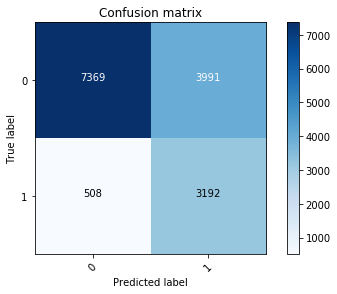

Precision = 0.444
Recall(TPR)=0.863
Fallout(FPR)=3.513e-01


In [245]:
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_tr, Y_tr)
y_pred = lrn.predict(X_te)
cm = confusion_matrix(Y_te, y_pred)
if lrn.classes_[0] == 1:
    cm = np.array([[cm[1,1], cm[1,0]], [cm[0,1], cm[0,0]]])

plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1)

In [246]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [247]:
print('Accuracy:', accuracy_score(Y_te, y_pred))
print('F1 score:', f1_score(Y_te, y_pred))

Accuracy: 0.701261620185923
F1 score: 0.5866029587429936


In [248]:
# understanding important features for high and low paying jobs

In [249]:
coff = pd.DataFrame(lrn.coef_).T
col = pd.DataFrame(col_tr).T
print(coff)

           0
0   0.000000
1   0.000000
2   0.560620
3  -0.275578
4   0.001215
5   0.000000
6   0.078826
7  -1.069787
8   0.446940
9   0.204855
10 -0.160163
11  0.000000
12  0.000000
13  0.000000
14  0.000000


In [250]:
print(col)

                      0                        1                      2   \
0  WorfClass_cat_Private  Education NumCat_Medium  Education NumCat_High   

             3                   4                     5                   6   \
0  AgeCat_Young  AgeCat_Middle_aged  Hours/WeekCat_Medium  Hours/WeekCat_High   

                          7                           8   \
0  Marital Status_cat_Single  Marital Status_cat_married   

                     9                    10                     11  \
0  Occupa_cat_Highskill  Occupa_cat_Lowskill  Relationship_ Husband   

                            12           13         14  
0  Relationship_ Not-in-family  Sex_ Female  Sex_ Male  
